# Several Regression Methods Comparison

This notebook would implement several machine learning methods:

- Linear Regression: https://scikit-learn.org/stable/modules/linear_model.html
- Decision Trees Regression: https://scikit-learn.org/stable/modules/tree.html#regression
- Random Forest Regression: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
- Neural Networks Regression: we will use Multi-layer perceptron. https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression

We will illustrate them and compare their performances on an example of regression: **Red Wine Quality**. 

In this notebook, you will learn:

- How to preprocess your data to prepare for training ML models.
- How to train your ML models based on cross-validation.
- How to evaluate your ML models based on testing data.

# Libraries

We will be comparing machine learning methods using a few different `sklearn` algorithms.

In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing: transformation functions
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PowerTransformer

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error

# sklearn regressors instead of classifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Data Processing

## Load Data

**Red Wine Quality**

**Our goal is to train a machine learning model to predict the quality score of the wine given phyicochemical information of it**

- Input variables (based on physicochemical tests):

    - fixed acidity

    - volatile acidity

    - citric acid

    - residual sugar

    - chlorides

    - free sulfur dioxide

    - total sulfur dioxide

    - density

    - pH

    - sulphates

    - alcohol

- Output variable (based on sensory data):

    - quality (score between 0 and 10)




In [4]:
# Load data
initial_data = pd.read_csv('winequality-red.csv')

In [5]:
# Look at the first 5 rows
initial_data.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# information of the data: 1599 data points, 11 features' columns and 1 target column
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
# check basic statistcs in each column: mean, std, min, max...
initial_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Tidy Data

### Check missing values
First, we should check if there are missing values in the dataset. 

In [7]:
# check if there are Null values
initial_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We could see that there is no missing value in the wine dataset. If there exists any missing data points in your own dataset, you could use the following code to discard them.  

In [9]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Shape of the data: we could see that there are 1,599 data points and 12 columns.
data_to_use.shape

(1599, 12)

### Extract X and y

First, we get the `X` and `y`.

Note that the `y` value is the column `quality`.

In [11]:
X = data_to_use.drop(axis=1, columns=['quality']) # X is a dataframe

y = data_to_use['quality'].values # y is an array

In [15]:
X.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

**Let's plot variables in both X and y by using a plot package `seaborn`.**

The following figure shows a `pairplot` for X and y. The diagonal are distributions for each variable in X and y. The scatter plots are the relationship for each pair of columns in the X and y.

In [30]:
import seaborn as sns

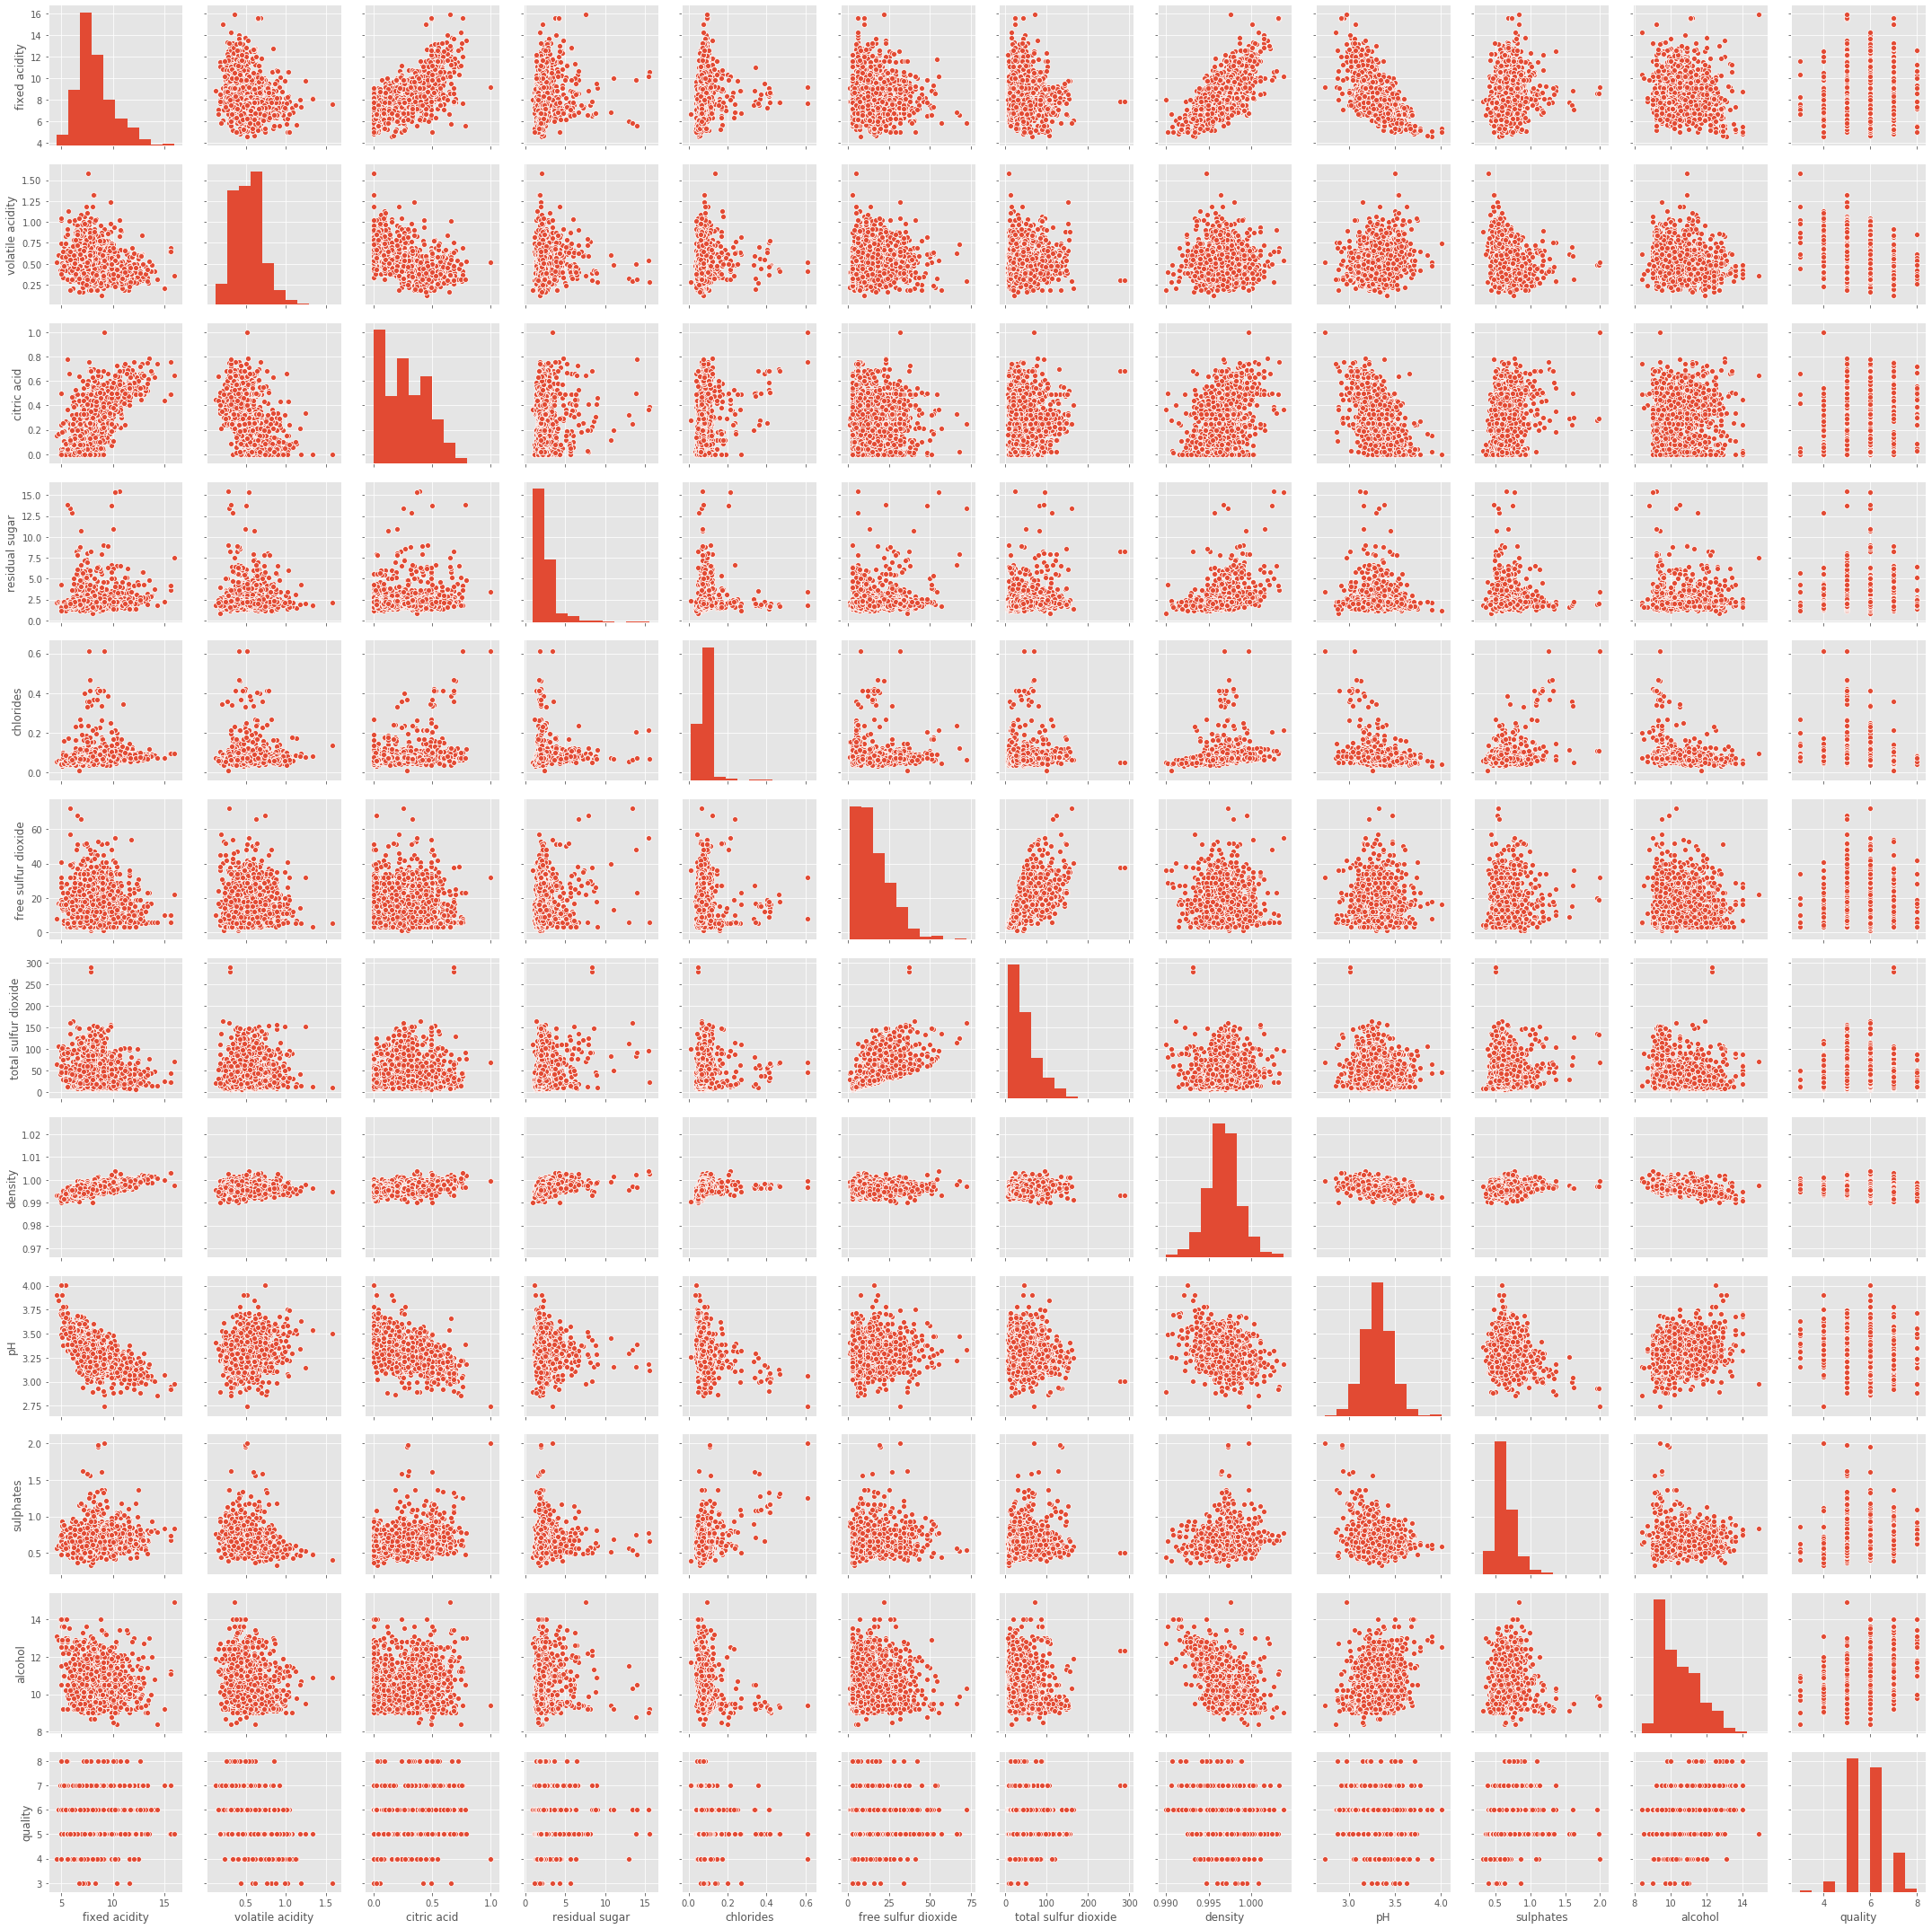

In [33]:
sns.pairplot(data=data_to_use);

### Split training and testing data

It is important to split `X` and `y` as training set and testing set. Here, we will split the original data as 70% training set and 30% testing set.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Transform training and testing data

#### Transformation on X_train, X_test

Scikit-learn provides a library of transformers (https://scikit-learn.org/stable/modules/preprocessing.html). Like other estimators, these are represented by classes with a `fit` method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set, and a `transform` method which applies this transformation model to unseen data. 

**NOTE: The reason of performing transformation after splitting the original data is that we will `fit` those parameters on training set**.

In addition, it is very common to want to perform different data transformation techniques on different columns in your input data. The `ColumnTransformer` is a class in the scikit-learn library that allows you to selectively apply data preparation transforms. For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

- In our case, we could see that some variables' distributions are very skewed according to the above figure. We need to apply some transformation on them to be as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness. Scikit-learn provides a transformation function called `PowerTransformer` that used to map data from any distribution to a Gaussian distribution. 

    - `PowerTransformer`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

- In addition, if there exists any categorical variables in X, we need to apply `OneHotEncoder` transformation function on them. 

    - `OneHotEncoder`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

**NOTE: There is a lot of transformation functions that could be applied based on different purpose. You might need to check here https://scikit-learn.org/stable/modules/preprocessing.html#**

First, we find out which columns are categorical and which are numerical.

In [34]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [35]:
numerical_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [36]:
categorical_cols

Index([], dtype='object')

So, we could see that there is NO categorical variables. Then, we only need to apply `PowerTransformer` functions on some variables in X. For simplicity, here we just apply this function to ALL variables in X. 

NOTE: there are two methods in `PowerTransformer`. 
- `PowerTransformer(method='box-cox')` : Box-Cox requires input data to be strictly positive
- `PowerTransformer(method='yeo-johnson')` : Yeo-Johnson supports both positive or negative data.

For simplicity, we just directly use `yeo-johnson` without checking if our data are strictly positive.

In [40]:
# define the transformation methods for the columns
t = [('gussian', PowerTransformer(method='yeo-johnson'), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('gussian',
                                 PowerTransformer(copy=True,
                                                  method='yeo-johnson',
                                                  standardize=True),
                                 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))],
                  verbose=False)

In [41]:
# apply transformation to both training and testing data 
X_train_transform = col_trans.transform(X_train)
X_test_transform = col_trans.transform(X_test)

We could look at the transformed training data. It becomes an array-like structure rather than a dataframe structure.

In [42]:
# look at the transformed training data
X_train_transform

array([[ 0.09977106,  3.29325189, -1.50499188, ...,  1.35463112,
        -1.34223492,  0.62191875],
       [-0.50167876, -0.14212793, -0.83532104, ..., -0.06186945,
        -1.59171191,  0.26085889],
       [ 0.38802342,  1.60940768, -1.50499188, ..., -0.25411512,
        -0.68488769, -0.65851126],
       ...,
       [-1.06238404,  1.10007288, -0.89817794, ...,  0.25457785,
        -1.34223492,  0.53678844],
       [-0.57621637,  0.63421129, -1.50499188, ...,  0.37979483,
        -0.40064853, -1.76053635],
       [ 0.59909818, -0.70929123,  1.14477178, ..., -0.64409363,
         0.44364193,  1.63509066]])

#### Transformation on y_train and y_test

For simplicity, we do not do any transformation on `y`. 

# Train ML Models

We will train several machine learning models for the training set and evaluate their performance on both training and testing set. Before doing this, let's first go through a standard procedure of training a certain classifier.

## Steps of Training Model

- Step 1: Train a ML model and validate it via 5-fold cross-validation (CV). The CV results will show how good the model has been trained by using the training data given a set of hyperparameters in the ML model. The normal metrics of evaluating a regression model include $R^2$ score and Mean squared error (MSE). There are more options :https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

- Step 2: Evaluate the model by using the testing data. It will show how good the model could be used to make predictions for unseen data.

**NOTE: For simplicity, we do not tune hyperparameters in the ML model and will use the default settings of hyperparameters in each ML model.**

**Let's firstly train a `Linear Regression` model as an example of Step 1 and Step 2.**

In [46]:
# ===== Step 1: cross-validation ========
# define a Linear classifier
clf = LinearRegression()

# define 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = KFold(n_splits=5, shuffle=True, random_state=123)

# define metrics for evaluating
scoring = ['r2', 'neg_mean_squared_error']

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_transform,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [47]:
cv_results

{'fit_time': array([0.03565621, 0.00058293, 0.00051999, 0.00047493, 0.00047684]),
 'score_time': array([0.00108075, 0.00047684, 0.00043917, 0.0004499 , 0.00049496]),
 'test_r2': array([0.39713854, 0.38484609, 0.40772452, 0.30456893, 0.37001071]),
 'test_neg_mean_squared_error': array([-0.39436627, -0.41423829, -0.40330589, -0.47354898, -0.41273806])}

The CV results include: 

- `fit_time`: The time for fitting the estimator on the train set for each cv split.

- `score_time`: The time for scoring the estimator on the test set for each cv split. 

- `test_score`: The score array for test scores on each cv split. Suffix `_score` in `test_score` changes to a specific metric like `test_r2` or `test_neg_mean_squared_error` if there are multiple scoring metrics in the scoring parameter.


**Typically, we will use the mean value of each metric to represent the evaluation results of cross-validation.** For example, we could calculate the mean value of the `R2` score: 

In [48]:
cv_results['test_r2'].mean()

0.3728577563795916

**In addition, the cross-validation step is used to find the best set of hyperparameters which give the "best" scores of metrics.** Since we do not tune hyperparameters in this case, we then directly fit the Linear Regression model by using the default values of hyperparameters and evaluate it on testing data.

In [52]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Linear Regression model
clf.fit(X=X_train_transform, y=y_train)

# predition on testing data
y_pred = clf.predict(X=X_test_transform)

# calculate R2 score 
r2_ontest = r2_score(y_true=y_test, y_pred=y_pred)

# calculate Mean squared error
mse_ontest = mean_squared_error(y_true=y_test, y_pred=y_pred)


# print the above results
print('The R2 score on the test set : {:1.5f}'.format(r2_ontest))
print('The Mean Squared Error (MSE) score on the test set: {:1.5f}'.format(mse_ontest))

The R2 score on the test set : 0.30566
The Mean Squared Error (MSE) score on the test set: 0.42260


Through the above steps, we could assess if the trained model is good for making predictions on unseen data. In this Linear regression model, we get 30.56% $R^2$ and MSE is 0.4226.

## Several ML Models

We will implement several ML models through the above steps. The only difference part is to change `clf = LinearRegression()` as other model functions, for example, `clf = DecisionTreeRegressor()`. 

The followings are ML models functions: 

- `LinearRegression()`
- `DecisionTreeRegressor()`
- `RandomForestRegressor()`
- `MLPRegressor()`

Note that in `MLPRegressor()` we set the solver as `adam` which has better performance for relatively large size of data. Also, we set the maximum iterations as 2000 to ensure convergence. `random_state` is used to ensure reproducible results.

In [60]:
# Define four models
models = [('LinearRegression', LinearRegression()),
          ('DecisionTree', DecisionTreeRegressor(random_state=123)),
          ('RandomForest', RandomForestRegressor(random_state=123)),
          ('MultiLayerPerceptron', MLPRegressor(random_state=123, solver='adam', max_iter=2000))
         ]

We could check the hyperparameters values in these models: 

In [61]:
for model_name, clf in models:
    print(clf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
MLPRegressor(activation=

**Finally, we write the code to perform the above four ML models and store their cross-validation results and evaluation results on testing data.**

In [62]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names_list = []
cv_fit_time_mean_list = []

cv_r2_mean_list = []
cv_mse_mean_list = []

test_r2_list = []
test_mse_list=[]


for model_name, clf in models:
    
    # ==== Step 1: Cross-validation =====
    
    # define  Stratified 5-fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    # define metrics for evaluating
    scoring = ['r2', 'neg_mean_squared_error']
    # perform the 5-fold CV and get the metrics results
    cv_results = cross_validate(estimator=clf,
                                X=X_train_transform,
                                y=y_train,
                                scoring=scoring,
                                cv=cv,
                                return_train_score=False)  # prevent to show the train scores on cv splits.

    # calculate the mean values of those scores
    cv_fit_time_mean = cv_results['fit_time'].mean()
    
    cv_r2_mean = cv_results['test_r2'].mean()
    cv_mse_mean = cv_results['test_neg_mean_squared_error'].mean()

    # store CV results into those lists
    model_names_list.append(model_name)
    cv_fit_time_mean_list.append(cv_fit_time_mean)
    cv_r2_mean_list.append(cv_r2_mean)
    cv_mse_mean_list.append(cv_mse_mean)

    # ==== Step 2: Evaluation on Testing data =====

    # fit model
    clf.fit(X=X_train_transform, y=y_train)

    # predition on testing data
    
    # predicted value
    y_pred = clf.predict(X=X_test_transform)  
    
    
    # calculate R2 score 
    r2_ontest = r2_score(y_true=y_test, y_pred=y_pred)

    # calculate Mean squared error
    mse_ontest = mean_squared_error(y_true=y_test, y_pred=y_pred)


    # store the above values
    test_r2_list.append(r2_ontest)
    test_mse_list.append(mse_ontest)
    

### Model Comparison

We've stored CV results and evaluation results of testing data for the four ML models. Then, we could create a dataframe to view them.

In [65]:
results_dict = {'Model Name': model_names_list,
                'CV Fit Time': cv_fit_time_mean_list,
                'CV R2 mean': cv_r2_mean_list,
                'CV MSE mean': cv_mse_mean_list,
                'Test R2': test_r2_list,
                'Test MSE': test_mse_list,
                }

results_df = pd.DataFrame(results_dict)

# sort the results according to F1 score on testing data
results_df.sort_values(by='Test MSE', ascending=True)

,Model Name,CV Fit Time,CV R2 mean,CV MSE mean,Test R2,Test MSE
2,RandomForest,0.272685,0.442001,-0.373703,0.455157,0.331614
0,LinearRegression,0.000669,0.372858,-0.419639,0.305663,0.422602
3,MultiLayerPerceptron,3.017359,0.308082,-0.462884,0.293073,0.430265
1,DecisionTree,0.005624,-0.044597,-0.699672,-0.016608,0.618750


#### MSE Comparison

Here, we choose `Mean Squared Error score` as the evaluation metric on testing data to show the performance of the trained model. According to the above table, we could see that `Random Forest Regression` model outperforms others because it has the lowest Mean Squared Error on testing data. 

Here, we have to highlight that the above results do not indicate that the `Multi-layer Perceptron` are "bad" model because we have not tuned hyperparameters of these models. If we do that, the performance will be improved in most cases. Yet, for this wine quality dataset, `Random Forest Regression` model are likely to be the best baseline model. 